In [29]:
import torch, torch.nn.functional as F
pi = torch.tensor([0.6, 0.4])
mu = torch.tensor([-3., 3.])
sigma = torch.tensor([1., 1.])

num_samples = 10
# Gumbel-softmax采样
def sample_gumbel_softmax(pi, tau, n=num_samples):
    g = -torch.log(-torch.log(torch.rand(n, len(pi))))
    w = F.softmax((pi.log() + g)/tau, dim=-1)
    eps = torch.randn(n, len(pi))
    x = (w * (mu + sigma * eps)).sum(-1)
    return x

# GMM采样
def sample_gmm(pi, n=num_samples):
    mix = torch.distributions.Categorical(probs=pi)
    x = torch.distributions.MixtureSameFamily(
        mix, torch.distributions.Normal(mu, sigma)).sample((n,))
    return x

x_gmm = sample_gmm(pi)
x_gumbel = sample_gumbel_softmax(pi, tau=0.1)

print(x_gmm.mean(), x_gumbel.mean())
print(x_gmm.std(), x_gumbel.std())

tensor(-0.7521) tensor(-0.0144)
tensor(3.2110) tensor(2.7550)


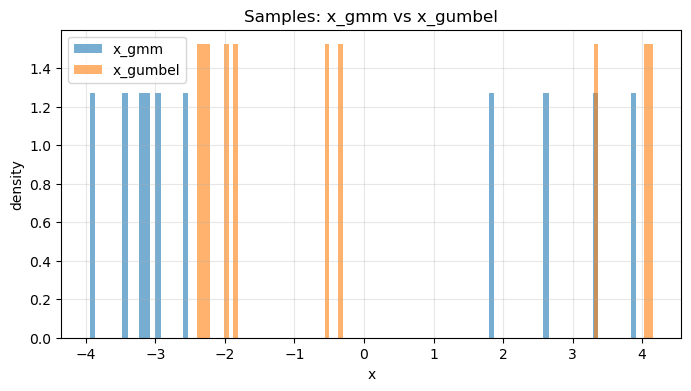

In [30]:
import matplotlib.pyplot as plt

# Use x_gumnel if it exists; otherwise fall back to x_gumbel (typo handling)
x_gumbel_like = globals().get('x_gumnel', x_gumbel)

plt.figure(figsize=(8, 4))
plt.hist(x_gmm.cpu().numpy(), bins=100, density=True, alpha=0.6, label='x_gmm')
plt.hist(x_gumbel_like.cpu().numpy(), bins=100, density=True, alpha=0.6, label='x_gumbel')
plt.xlabel('x')
plt.ylabel('density')
plt.title('Samples: x_gmm vs x_gumbel')
plt.legend()
plt.grid(alpha=0.3)
plt.show()